<a href="https://colab.research.google.com/github/andrelsouza/Analise_sentimento_Python/blob/main/analise_sentimento_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic Imports
import tweepy
import pandas as pd     
import numpy as np 
import time
import os
import re
from bs4 import BeautifulSoup

# Plotting and Visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
%matplotlib inline

# TextBlob Imports
from textblob import TextBlob
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

# NLTK Imports
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

#MAP
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from geopy.geocoders import Nominatim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Funções de Pré Processamento dos dados do Twitter


In [ ]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)



def Lemmatization(instancia):
  palavras = []
  for w in instancia.split():
    palavras.append(wordnet_lemmatizer.lemmatize(w))
  return (" ".join(palavras))


def prep_tweets(tweet):
  tweet = BeautifulSoup(tweet,"html.parse").get_text()
  tweet = re.sub(r"[^a-zA-Zà-úÀ-Ú0-9]","",tweet.lower())
  return tweet


In [ ]:
chave_consumidor = 'vw9csY2Gwn5w9AKLUXL75c564'
segredo_consumidor = 'jrNk8I20UXh47FU7xp0Gwd7d8iNbFyj6qdgAJ0i0Kx8BO32zAh'
token_acesso = '178875463-RidHkuh3f8PQjAsCd9yjKcegzBnGxVr4ALLWipOJ'
token_acesso_segredo = 'sNND5cMURtRMiT5acxfIvmquvlPdx5t3EE4ZIgkqYLkP7'

In [ ]:
auth = tweepy.OAuthHandler(chave_consumidor,segredo_consumidor)
auth.set_access_token(token_acesso,token_acesso_segredo)
api = tweepy.API(auth)

In [ ]:
search_word = ['enfermagem']

In [ ]:
tweets = []
info = []

for tweet in tweepy.Cursor(api.search,
                           q=search_word,
                           tweet_mode='extended',
                           rpp=1000,
                           result_type="popular",
                           include_entities=True,
                           lang="pt").items(20000):
    if 'retweeted_status' in dir(tweet):
        aux=tweet.retweeted_status.full_text
    else:
        aux=tweet.full_text
        
    newtweet = aux.replace("\n", " ")
   
    tweets.append(newtweet)
    info.append(tweet)
    
    file = open("enfermagem.txt", "a", -1, "utf-8")
    file.write(newtweet+'\n')
    file.close()
    
    time.sleep(0.5)

In [ ]:
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))



In [ ]:
#Construction of the dataframe
tweets_df = pd.DataFrame(tweets, columns=['Tweets']) 

tweets_df['len']  = np.array([len(tweet) for tweet in tweets])
tweets_df['ID']   = np.array([tweet.id for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes']  = np.array([tweet.favorite_count for tweet in info])
tweets_df['RTs']    = np.array([tweet.retweet_count for tweet in info])
tweets_df['User Location']    = np.array([tweet.user.location for tweet in info])
tweets_df['Geo']    = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates']    = np.array([tweet.coordinates for tweet in info])

tweets_df.to_csv("enfermeiros.csv")

In [ ]:
tweets_df.shape

(15, 10)

In [ ]:
tweets_df


,Tweets,len,ID,Date,Source,Likes,RTs,User Location,Geo,Coordinates
0,A estudante Thais Carvalho está no último ano ...,168,1395343421531992066,2021-05-20 11:39:30,Twitter Web App,2269,463,Brasil,None,None
1,"Recentemente, a possibilidade de fechamento do...",300,1396570546867998725,2021-05-23 20:55:40,Twitter for iPhone,703,26,"Amapá, Brasil",None,None
2,Os heróis da enfermagem precisam de reconhecim...,299,1394634725889875975,2021-05-18 12:43:24,Twitter for Android,532,96,"Vila Velha, Brasil",None,None
3,Hoje é o Dia Nacional do Técnico e Auxiliar de...,291,1395466428409651202,2021-05-20 19:48:17,Twitter Web App,299,58,"Brasil, Brasília",None,None
4,Conseguimos o apoio dos senadores p/ votar em ...,274,1394634129854058497,2021-05-18 12:41:02,Twitter Web App,739,71,"Vila Velha, Brasil",None,None
5,Discurso de heróis e heroínas da saúde não gar...,234,1396167296930963460,2021-05-22 18:13:17,Twitter for Android,283,49,Porto Alegre,None,None
6,"Presidente Rodrigo Pacheco, não seja um inimig...",191,1395419432055410695,2021-05-20 16:41:32,Twitter for iPhone,242,63,Recife - PE,None,None
7,"Estamos vacinando, nesta terça (18), profissio...",274,1394628703229992960,2021-05-18 12:19:28,Twitter Web App,386,43,"Belém, Pará, Brasil",None,None
8,"Na manhã deste sábado, recebi o presidente do ...",257,1396190487573303299,2021-05-22 19:45:26,Twitter for iPhone,376,20,"Amazonas, Brasil",None,None
9,Técnica em enfermagem atravessa rio em cocheir...,161,1396244985754779650,2021-05-22 23:22:00,TweetDeck,191,20,Teresina - Piauí,None,None


In [ ]:
# Aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in tweets]

In [ ]:
tweets_tokenized = [tweet_tokenizer.tokenize(Tweets) for Tweets in tweets_df]

In [ ]:
tweets[:2]

['estudante thais carvalho último ano enfermagem atua voluntária campanha vacinação "fiquei estado choque", disse',
 'recentemente, possibilidade fechamento cursos direito enfermagem campus binacional unifap mobilizou oiapoque além garantir recursos bancada federal p/ manutenção campus, colocamos individualmente r$ 1,2 milhão p/ construção novo bloco']

In [ ]:
tweets_df["tweets_ajustados"] = tweets

In [ ]:
tweets_df.head()

,Tweets,len,ID,Date,Source,Likes,RTs,User Location,Geo,Coordinates,tweets_ajustados
0,A estudante Thais Carvalho está no último ano ...,168,1395343421531992066,2021-05-20 11:39:30,Twitter Web App,2269,463,Brasil,None,None,estudante thais carvalho último ano enfermagem...
1,"Recentemente, a possibilidade de fechamento do...",300,1396570546867998725,2021-05-23 20:55:40,Twitter for iPhone,701,26,"Amapá, Brasil",None,None,"recentemente, possibilidade fechamento cursos ..."
2,Os heróis da enfermagem precisam de reconhecim...,299,1394634725889875975,2021-05-18 12:43:24,Twitter for Android,532,96,"Vila Velha, Brasil",None,None,heróis enfermagem precisam reconhecimento! hoj...
3,Hoje é o Dia Nacional do Técnico e Auxiliar de...,291,1395466428409651202,2021-05-20 19:48:17,Twitter Web App,299,58,"Brasil, Brasília",None,None,hoje dia nacional técnico auxiliar enfermagem ...
4,Conseguimos o apoio dos senadores p/ votar em ...,274,1394634129854058497,2021-05-18 12:41:02,Twitter Web App,739,71,"Vila Velha, Brasil",None,None,conseguimos apoio senadores p/ votar regime ur...


In [ ]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(tweets_df.tweets_ajustados)

In [ ]:
cv.get_feature_names()

['12',
 '15h',
 '18',
 '19',
 '1962',
 '1981',
 '20',
 '21',
 '24',
 '2564',
 '30h',
 '76',
 '81',
 'acompanhe',
 'aconteceu',
 'agenda',
 'agora',
 'além',
 'amazonas',
 'ano',
 'anote',
 'apenas',
 'apoio',
 'aprovapl2564',
 'aprovação',
 'artigo',
 'assinando',
 'atravessa',
 'atua',
 'atuava',
 'auxiliar',
 'auxiliardeenfermagem',
 'bahia',
 'bancada',
 'binacional',
 'bloco',
 'brasileiras',
 'brasília',
 'campanha',
 'campus',
 'capitais',
 'carga',
 'carreata',
 'carvalho',
 'caso',
 'categoria',
 'choque',
 'cidade',
 'cidades',
 'cocheira',
 'colocamos',
 'combate',
 'combú',
 'comemoração',
 'conseguimos',
 'conselho',
 'construção',
 'continuar',
 'contra',
 'covid',
 'cuidado',
 'curso',
 'cursos',
 'dando',
 'deficiência',
 'deliberação',
 'dessas',
 'deste',
 'dia',
 'diariamente',
 'dias',
 'dignidade',
 'direito',
 'direitos',
 'discurso',
 'disse',
 'enfermagem',
 'enfermeira',
 'enfermeiras',
 'enfermeiros',
 'entenda',
 'entrar',
 'esforçam',
 'especial',
 'essenciai

**Analisando alguns dados dos Tweets**

In [ ]:


def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


def sentiment(tweet):
    
    polarity = 0
    
    #blob = TextBlob(tweet, classifier=cl)
    blob = TextBlob(clean_tweet(tweet), classifier=cl) #Clean Tweets
    
    for s in blob.sentences:
        polarity = s.classify() + polarity
    
    if polarity > 0:
        return 1
    elif polarity < 0:
        return -1
    else:
        return 0

In [ ]:

# Top Searched Tweets
fav_max = np.max(tweets_df['Likes'])
rt_max  = np.max(tweets_df['RTs'])

fav = tweets_df[tweets_df.Likes == fav_max].index[0]
rt  = tweets_df[tweets_df.RTs == rt_max].index[0]

# Max FAVs:
print("O tweet com mais curtidas é: \n{}".format(tweets_df['Tweets'][fav]))
print("Número de curtidas: {}".format(fav_max))
print("\n")
# Max RTs:
print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][rt]))
print("Número de retweets: {}".format(rt_max))

O tweet com mais curtidas é: 
A estudante Thais Carvalho está no último ano de enfermagem e atua como voluntária na campanha de vacinação. "Fiquei em estado de choque", disse https://t.co/QWgsag3Ddb
Número de curtidas: 2269


O tweet com mais retweet é: 
A estudante Thais Carvalho está no último ano de enfermagem e atua como voluntária na campanha de vacinação. "Fiquei em estado de choque", disse https://t.co/QWgsag3Ddb
Número de retweets: 463


**Fazendo a contagem de palavras**


In [ ]:
word_count = pd.DataFrame(cv.get_feature_names(),columns=["word"])

word_count["contagem"] = count_matrix.sum(axis = 0).tolist()[0]
word_count = word_count.sort_values("contagem",ascending = False).reset_index(drop=True)
word_count

,word,contagem
0,enfermagem,17
1,dia,6
2,profissionais,5
3,salarial,5
4,piso,4
...,...,...
242,garante,1
243,gratidão,1
244,gt,1
245,heroínas,1


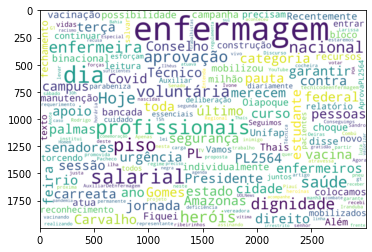

In [ ]:
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

words = ' '.join(tweets_df['Tweets'])

words_clean = " ".join([word for word in words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=stopwords,
               width=3000, 
               height=2000,
               normalize_plurals= True).generate(words_clean)

plt.imshow(wc, interpolation="bilinear")
plt.show()